<a href="https://colab.research.google.com/github/lokesh331/lokesh12/blob/main/DAY_13_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
Product_ID         0
Product_Name       0
Region             0
Marketing_Spend    0
Sales              0
Effectiveness      0
Side_Effects       0
Age_Group          0
Trial_Period       0
dtype: int64
Columns in DataFrame:
Index(['Product_ID', 'Product_Name', 'Region', 'Marketing_Spend', 'Sales',
       'Effectiveness', 'Side_Effects', 'Age_Group', 'Trial_Period'],
      dtype='object')


<ipython-input-17-f078453fedd8>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Trial_Period'] = pd.to_datetime(df['Trial_Period'], errors='coerce')


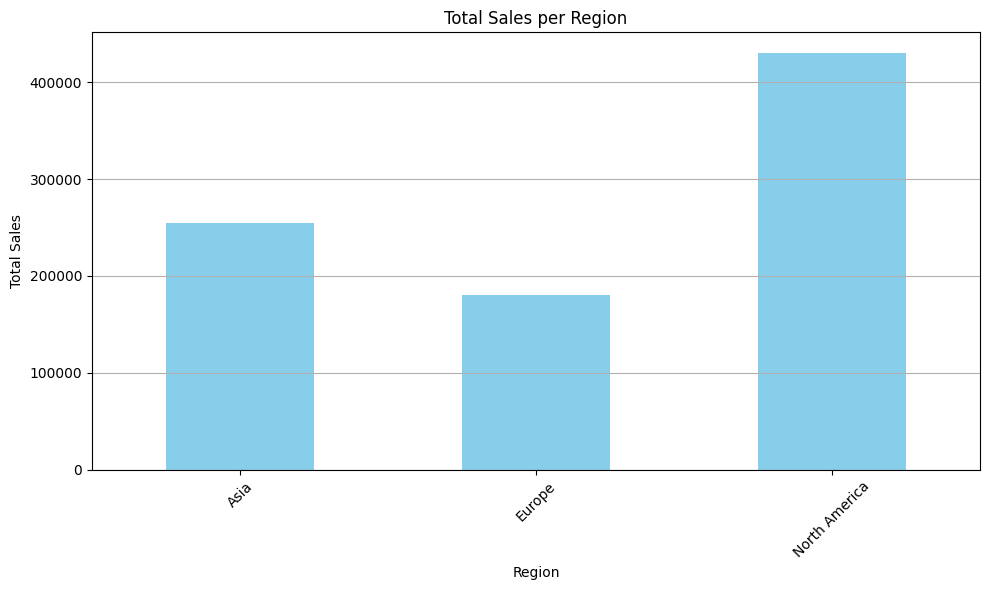

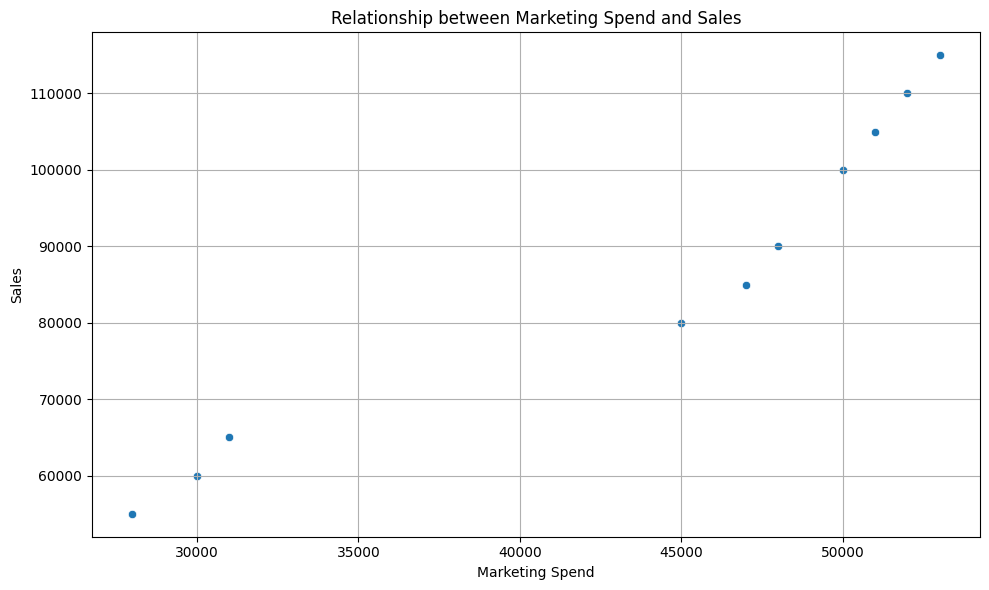

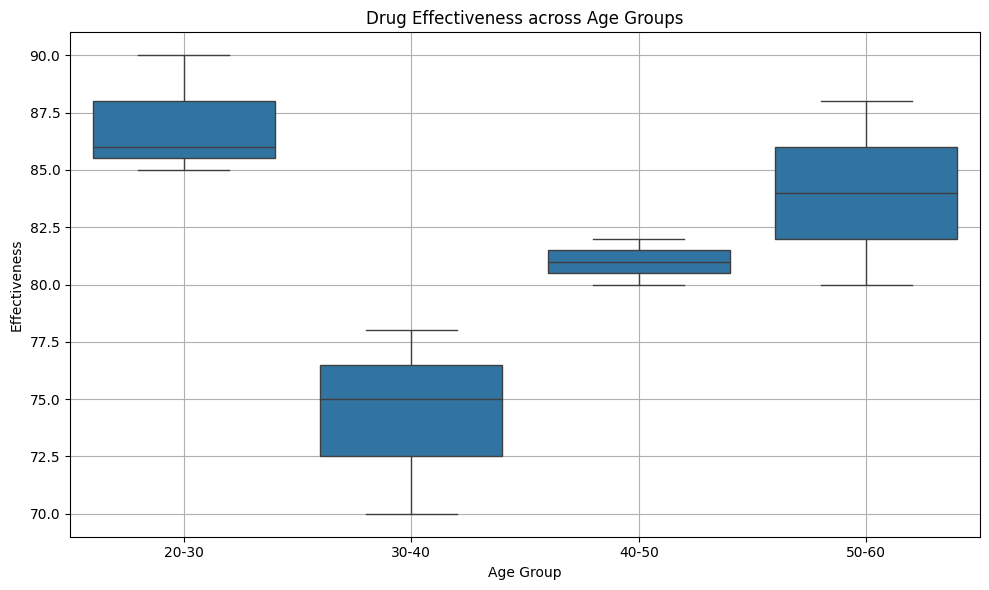

The 'Product' column is missing or contains only null values.


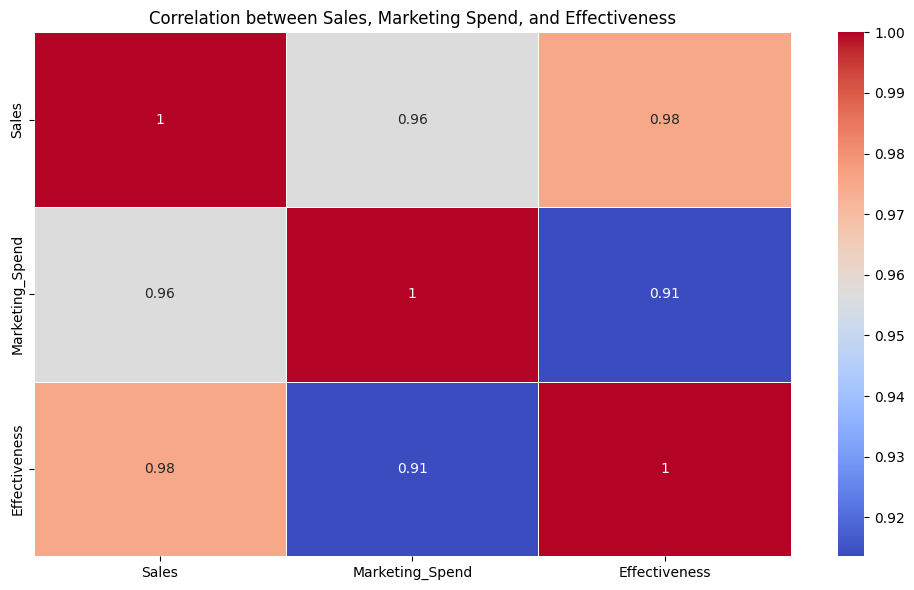

In [17]:
#day13
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'/content/drive/MyDrive/lokesh/Day_13_Pharma_data.csv'
df = pd.read_csv(file_path)
print("Missing values:")
print(df.isnull().sum())
df = df.drop_duplicates()
df['Marketing_Spend'] = df['Marketing_Spend'].fillna(df['Marketing_Spend'].mean())
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Effectiveness'] = df['Effectiveness'].fillna(df['Effectiveness'].mean())
print("Columns in DataFrame:")
print(df.columns)
if 'Trial_Period' in df.columns:
    df['Trial_Period'] = pd.to_datetime(df['Trial_Period'], errors='coerce')
plt.figure(figsize=(10, 6))
total_sales_per_region = df.groupby('Region')['Sales'].sum()
total_sales_per_region.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Marketing_Spend', y='Sales')
plt.title('Relationship between Marketing Spend and Sales')
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_Group', y='Effectiveness')
plt.title('Drug Effectiveness across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Effectiveness')
plt.grid(True)
plt.tight_layout()
plt.show()
if 'Product' in df.columns and not df['Product'].isnull().all():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Trial_Period', y='Sales', hue='Product')
    plt.title('Sales Trend for Each Product over Different Trial Periods')
    plt.xlabel('Trial Period')
    plt.ylabel('Sales')
    plt.legend(title='Product')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("The 'Product' column is missing or contains only null values.")
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Sales', 'Marketing_Spend', 'Effectiveness']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Sales, Marketing Spend, and Effectiveness')
plt.tight_layout()
plt.show()